# Dataset Exploration

In [287]:
import math
import random
import numpy as np
import pandas as pd
from collections import Counter
from scipy import stats
from scipy.stats import beta
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
path = "D:/CSE532advancedProject\State_of_Iowa_Salary_Book.csv"

In [3]:
def money_to_float(x):
    try:
        if type(x) == float:
            return x
        return float(x.strip('$'))
    except ValueError:
        return float('nan')

def base_salary_to_float(x):
    try:
        if type(x) == float and math.isnan(x):
            return (None, float('nan'))
        elif type(x) == float:
            return (None, x)
        x = x.strip(" ")
        if x == "":
            return (None, float('nan'))
        elif x == "TERMINATED":
            return ("TERMINATED", float('nan'))
        elif x == "Terminated":
            return ("Terminated", float('nan'))
        elif x == "-0-":
            return ("-0-", float('nan'))
        elif x == "ON LEAVE":
            return ("ON LEAVE", float('nan'))
        elif x == "nan":
            return (None, float('nan'))
        elif x == float("nan"):
            return (None, float('nan'))
        else:
            s = x.replace('/', " ").split(' ')
            if len(s) < 2:
                return (None, float(s[0].strip('$').replace(',', "")))
            return (s[1], float(s[0].strip('$').replace(',', "")))
    except:
        # this is to show rows that failed the parsing
        print("<-"+x+"->", type(x))

In [4]:
# read csv
data = pd.read_csv(path, parse_dates=[0,8], converters={'Total Salary Paid': money_to_float, 'Base Salary': base_salary_to_float, 'Travel & Subsistence': money_to_float})
# split Base Salary tuple into two columns
base_salary_parsed = data["Base Salary"].apply(pd.Series).rename(columns={0:'Base Salary Payment Method', 1:'Base Salary Payment Amount'})
data.insert(8, 'Base Salary Payment Method', base_salary_parsed['Base Salary Payment Method'])
data.insert(9, 'Base Salary Payment Amount', base_salary_parsed['Base Salary Payment Amount'])
# delete Base Salary tuple column
data.pop("Base Salary")

<-HR-> <class 'str'>
<-YR-> <class 'str'>
<-20.12HR-> <class 'str'>
<-262.99DA-> <class 'str'>


0               (HR, 31.62)
1         (TERMINATED, nan)
2              (BW, 2212.8)
3              (BW, 1226.4)
4         (TERMINATED, nan)
5         (TERMINATED, nan)
6         (TERMINATED, nan)
7         (TERMINATED, nan)
8              (BW, 2194.4)
9         (TERMINATED, nan)
10        (TERMINATED, nan)
11        (TERMINATED, nan)
12             (BW, 3375.2)
13        (TERMINATED, nan)
14        (TERMINATED, nan)
15             (BW, 3349.6)
16           (YR, 144200.0)
17             (BW, 1237.6)
18             (BW, 2908.8)
19             (BW, 3193.6)
20        (TERMINATED, nan)
21             (BW, 1598.4)
22        (TERMINATED, nan)
23        (TERMINATED, nan)
24        (TERMINATED, nan)
25        (TERMINATED, nan)
26             (BW, 1180.8)
27             (BW, 3087.2)
28             (BW, 1437.6)
29             (BW, 4792.0)
                ...        
665295          (HR, 23.91)
665296        (HR, 25629.0)
665297          (HR, 22.88)
665298    (TERMINATED, nan)
665299          (HR,

In [5]:
data.dtypes

Fiscal Year                   datetime64[ns]
Department                            object
Agency/Institution                    object
Name                                  object
Gender                                object
Place of Residence                    object
Position                              object
Base Salary Payment Method            object
Base Salary Payment Amount           float64
Base Salary Date              datetime64[ns]
Total Salary Paid                    float64
Travel & Subsistence                 float64
dtype: object

In [7]:
print("Number of unique elements per column")
for k in ["Fiscal Year", "Department", "Agency/Institution", "Gender", "Place of Residence", "Position", "Base Salary Payment Method"]:
    c = data[k].unique()
    print(k, ":", len(c))

Number of unique elements per column
Fiscal Year : 11
Department : 53
Agency/Institution : 37
Gender : 7
Place of Residence : 1426
Position : 5699
Base Salary Payment Method : 16


In [8]:
for k in ["Fiscal Year", "Department", "Agency/Institution", "Gender", "Place of Residence", "Position", "Base Salary Payment Method"]:
    c = data[k].value_counts()
    print(str(k)+":\n"+str(c)+"\n\n")

Fiscal Year:
2007-01-01    67695
2009-01-01    60328
2008-01-01    60262
2015-01-01    60138
2011-01-01    60125
2012-01-01    59929
2014-01-01    59859
2013-01-01    59488
2017-01-01    59400
2010-01-01    59113
2016-01-01    58988
Name: Fiscal Year, dtype: int64


Department:
University of Iowa                                     235607
Iowa State University                                  112766
Human Services, Department of                           65299
Transportation, Department of                           38510
Corrections, Department of                              35940
University of Northern Iowa                             30175
Judicial Branch                                         21971
Natural Resources, Department of                        17388
Public Safety, Department of                            10917
Iowa Veterans Home                                       9950
Iowa Workforce Development                               9891
Education, Department of               

In [458]:
gbyDep = data.groupby(data["Department"])
gbyDep.size().reset_index(name='Department count').sort_values(['Department count'], ascending=False) 

,Department,Department count
50,University of Iowa,235607
29,Iowa State University,112766
21,"Human Services, Department of",65299
48,"Transportation, Department of",38510
9,"Corrections, Department of",35940
51,University of Northern Iowa,30175
33,Judicial Branch,21971
37,"Natural Resources, Department of",17388
43,"Public Safety, Department of",10917
31,Iowa Veterans Home,9950


In [537]:
print(data.shape)
filter_one = data[data['Total Salary Paid'] > 15000]
print(filter_one.shape)
filter_two=filter_one[filter_one['Total Salary Paid']<200000]
print(filter_two.shape)

(665325, 12)
(537087, 12)
(529523, 12)


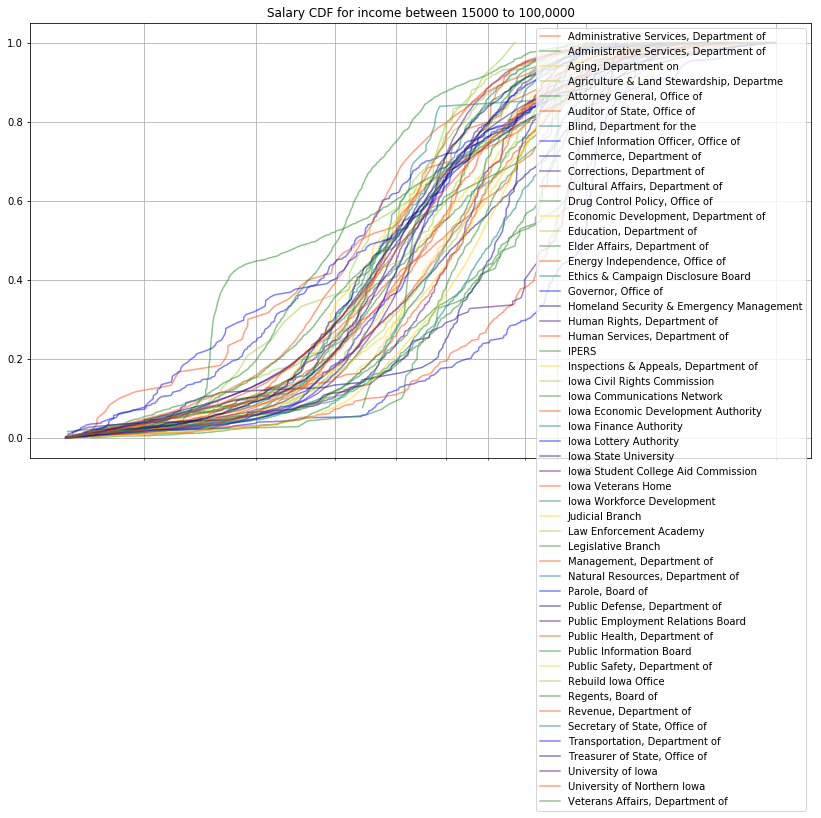

In [305]:
plt.figure(figsize=(14, 8))
plt.grid(True, which="both")
colors = ['#FF4500', '#228B22', '#FFD700', '#9ACD32', '#228B22','#FF4500', '#008080', '#0000FF', '#00008B', '#4B0082']
UniversityOfIowaCDF=[]
UniversityOfIowaStateCDF=[]
UniversityOfNorthernIowaCDF=[]
for k, i in enumerate(filter_two.groupby(["Department"])):   
    title=i[0]
    i = i[1]
    l = len(i["Total Salary Paid"])
    plt.plot(i["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum(),
                    label=str(title)[:40],
                    color=colors[k%len(colors)],
                    alpha=0.5)
plt.title("Salary CDF for income between 15000 to 100,0000")
plt.semilogx(True, basex=10)
plt.legend(loc='best')
plt.show()         

length of CDF of university of Iowa is  163404
length of CDF of university of Iowa state is  56433
length of CDF of university of Northn Iowa is  20239


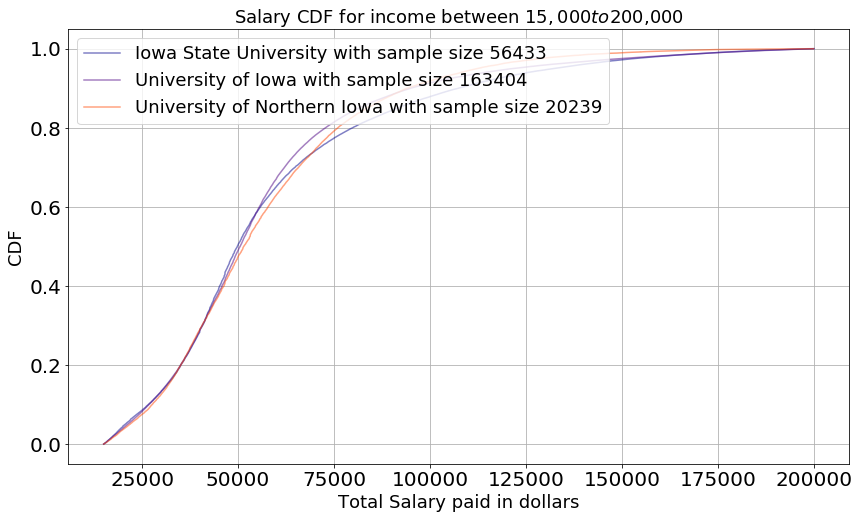

In [529]:
plt.figure(figsize=(14, 8))
plt.grid(True, which="both")
colors = ['#FF4500', '#228B22', '#FFD700', '#9ACD32', '#228B22','#FF4500', '#008080', '#0000FF', '#00008B', '#4B0082']
UniversityOfIowaCDF=[]
UniversityOfIowaStateCDF=[]
UniversityOfNorthernIowaCDF=[]
for k, i in enumerate(filter_two.groupby(["Department"])):    
    if i[0]=="University of Iowa" or i[0]=="Iowa State University" or i[0]=="University of Northern Iowa":
        if i[0]=="University of Iowa":
            UniversityOfIowaCDF=UniversityOfIowaCDF+i[1]["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum().values.tolist()
            LengthOfSample=len(UniversityOfIowaCDF)
        elif i[0]=="Iowa State University":
            UniversityOfIowaStateCDF=UniversityOfIowaStateCDF+i[1]["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum().values.tolist()
            LengthOfSample=len(UniversityOfIowaStateCDF)
        elif i[0]=="University of Northern Iowa":
            UniversityOfNorthernIowaCDF=UniversityOfNorthernIowaCDF+i[1]["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum().values.tolist()
            LengthOfSample=len(UniversityOfNorthernIowaCDF)
        title=i[0]
        i = i[1]
        l = len(i["Total Salary Paid"])
        plt.plot(i["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum(),
                    label=str(title)[:40]+ " with sample size "+ str(LengthOfSample),
                    color=colors[k%len(colors)],
                    alpha=0.5)
plt.title("Salary CDF for income between $15,000  to  $200,000",fontsize=18)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fo
#plt.semilogx(True, basex=10)
plt.legend(loc='upper left', prop={'size': 18})
plt.xlabel("Total Salary paid in dollars", fontsize=18)
plt.ylabel("CDF",fontsize=18)
#plt.show()    
plt.savefig("ThreeUniversityCDF.png")
print("length of CDF of university of Iowa is ", len(UniversityOfIowaCDF))
print("length of CDF of university of Iowa state is ", len(UniversityOfIowaStateCDF))
print("length of CDF of university of Northn Iowa is ",len(UniversityOfNorthernIowaCDF ))


In [530]:
def BetaDistributionTest(DataFrame, DepartmentName):
    SpecDepFrame=DataFrame.loc[DataFrame['Department'] == DepartmentName]
    SpecDepFrame.hist(column='Total Salary Paid', bins=100)
    plt.title(DepartmentName)
    plt.savefig( DepartmentName+".png")
    MaxSalary=SpecDepFrame["Total Salary Paid"].max()
    SpecDepFrame=SpecDepFrame["Total Salary Paid"]/MaxSalary
    SpecDepFrame= SpecDepFrame.tolist()
    SpecDepFrame=np.array( SpecDepFrame)
    meanSalary=np.mean(SpecDepFrame)
    varianceSalary=np.var(SpecDepFrame)
    middle_value=meanSalary*(1-meanSalary)/varianceSalary-1
    alpha=meanSalary*middle_value
    beta=(1-meanSalary)*middle_value
    print("alpha for "+DepartmentName+" is ", alpha)
    print("beta for "+ DepartmentName + " is ", beta)
    BetaDistriData=np.random.beta(alpha, beta, len(SpecDepFrame))
    print("the ks test for betadistribution of " +DepartmentName 
          +" origional data and beta distribution data is " ,stats.ks_2samp(SpecDepFrame, BetaDistriData))
    print("the critical value to compare to is ", 1.96/math.sqrt(len(SpecDepFrame)))       


# Beta distribution KS test with all data samples 

alpha for Iowa State University is  1.916856142671159
beta for Iowa State University is  4.528599615831349
the ks test for betadistribution of Iowa State University origional data and beta distribution data is  Ks_2sampResult(statistic=0.10197445795802029, pvalue=0.0)
the critical value to compare to is  0.007290679889783661


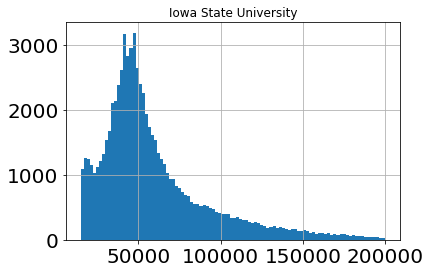

In [531]:
BetaDistributionTest(filter_two, "Iowa State University")

alpha for University of Iowa is  2.1704391202660287
beta for University of Iowa is  5.41364067720982
the ks test for betadistribution of University of Iowa origional data and beta distribution data is  Ks_2sampResult(statistic=0.10237086375742033, pvalue=0.0)
the critical value to compare to is  0.004474570981719508


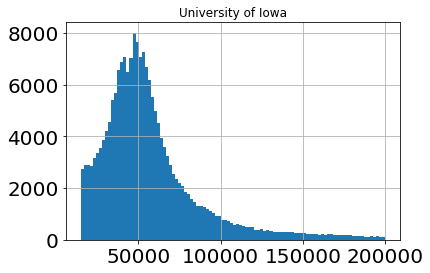

In [532]:
BetaDistributionTest(filter_two, "University of Iowa")

alpha for University of Northern Iowa is  2.7255136052323303
beta for University of Northern Iowa is  6.779074363533838
the ks test for betadistribution of University of Northern Iowa origional data and beta distribution data is  Ks_2sampResult(statistic=0.06120894385446074, pvalue=8.04986174850959e-37)
the critical value to compare to is  0.013120130797591072


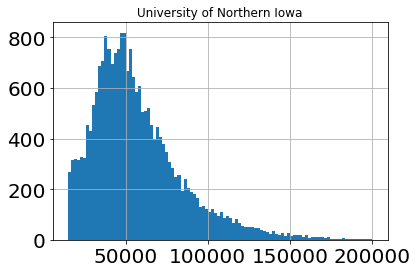

In [533]:
BetaDistributionTest(filter_two, "University of Northern Iowa")

# are the distribution the same with the 3 universities? KS test 

In [538]:
UIowaStateFrame=filter_two.loc[filter_two['Department'] == "Iowa State University"]
UIowaStateOrigion=UIowaStateFrame['Total Salary Paid'].tolist()

UIowaFrame=filter_two.loc[filter_two['Department'] == "University of Iowa"]
UIowaOrigion=UIowaFrame["Total Salary Paid"].tolist()


UNorIowaFrame=filter_two.loc[filter_two['Department'] == "University of Northern Iowa"]
UNorIowaOrigion=UNorIowaFrame["Total Salary Paid"].tolist()


n1= len(UIowaStateOrigion)
n2=len(UIowaOrigion)
n3=len(UNorIowaOrigion)
print(stats.ks_2samp(UIowaStateOrigion, UIowaOrigion))
print("critical value to compare is ", 1.96*math.sqrt((n1+n2)/(n1*n2)))
print(stats.ks_2samp(UIowaStateOrigion, UNorIowaOrigion))
print("critical value to compare is ",1.96*math.sqrt((n1+n3)/(n1*n3)) )
print(stats.ks_2samp(UIowaOrigion, UNorIowaOrigion))
print("critical value to compare is ",1.96*math.sqrt((n2+n3)/(n2*n3)) )


Ks_2sampResult(statistic=0.04221579390581909, pvalue=8.903089754476165e-82)
critical value to compare is  0.008554285401232658
Ks_2sampResult(statistic=0.04102091603510927, pvalue=2.1496944321091463e-25)
critical value to compare is  0.015009725027501124
Ks_2sampResult(statistic=0.044696389692510885, pvalue=3.559153294590455e-35)
critical value to compare is  0.013862164968587845


# Beta distribution test with ramdomly selected 100 samples 

In [ ]:
def RandomPickBetaDistributionTest(DataFrame, DepartmentName):
    SpecDepFrame=DataFrame.loc[DataFrame['Department'] == DepartmentName]
    SpecDepFrame.hist(column='Total Salary Paid', bins=100)
    plt.title(DepartmentName)
    plt.savefig( DepartmentName+".png")
    MaxSalary=SpecDepFrame["Total Salary Paid"].max()
    SpecDepFrame=SpecDepFrame["Total Salary Paid"]/MaxSalary
    SpecDepFrame= SpecDepFrame.tolist()
    SpecDepFrame=np.array( SpecDepFrame)
    meanSalary=np.mean(SpecDepFrame)
    varianceSalary=np.var(SpecDepFrame)
    middle_value=meanSalary*(1-meanSalary)/varianceSalary-1
    alpha=meanSalary*middle_value
    beta=(1-meanSalary)*middle_value
    print("alpha for "+DepartmentName+" is ", alpha)
    print("beta for "+ DepartmentName + " is ", beta)
    BetaDistriData=np.random.beta(alpha, beta, len(SpecDepFrame))
    print("the ks test for betadistribution of " +DepartmentName 
          +" origional data and beta distribution data is " ,stats.ks_2samp(SpecDepFrame, BetaDistriData))
    print("the critical value to compare to is ", 1.96/math.sqrt(len(SpecDepFrame)))       



# destribution of department mean salary 

number of department is  53


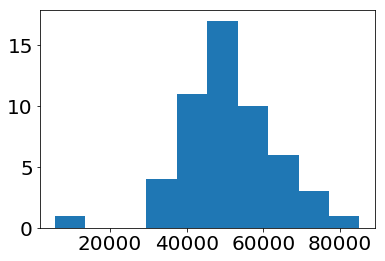

the mean is  50782.26138132772
the mean square is  2746365942.128298
so the miu is  50782.26138132772
so the variance is  167527871.12680912


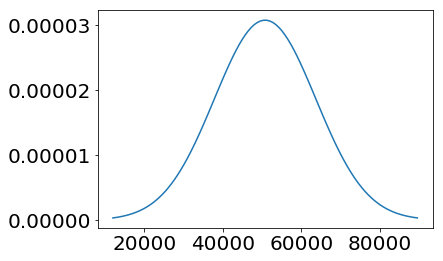

Ks_2sampResult(statistic=0.16981132075471694, pvalue=0.39527179862811873)
the critical value to compare with is  0.26647949406045673


In [539]:
department_mean=[]
for k, i in enumerate(data.groupby(["Department"])):
    department_mean.append(i[1]['Total Salary Paid'].mean())
print("number of department is ", len(department_mean))
plt.hist(department_mean, bins=10)  
plt.show()
sum_square=0
mean=0
for elements in department_mean:
    mean=mean+elements
    sum_square=sum_square+math.pow(elements,2)
sum_square_mean=sum_square/len(department_mean)
mean=mean/len(department_mean)
print("the mean is ", mean)
print("the mean square is ", sum_square_mean)
miu=mean
variance=sum_square_mean-math.pow(mean,2)
print("so the miu is ", miu)
print("so the variance is ", variance)

sigma = math.sqrt(variance)
x = np.linspace(miu - 3*sigma, miu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, miu, sigma))
plt.show()

s = np.random.normal(miu, sigma, 53)
print(stats.ks_2samp(s, department_mean))
print("the critical value to compare with is ", 1.94/math.sqrt(53))

Administrative Services, Department of
Administrative Services, Department of 
Aging, Department on
Agriculture & Land Stewardship, Department of
Attorney General, Office of
Auditor of State, Office of
Blind, Department for the
Chief Information Officer, Office of
Commerce, Department of
Corrections, Department of
Cultural Affairs, Department of
Drug Control Policy, Office of
Economic Development, Department of
Education, Department of
Elder Affairs, Department of
Energy Independence, Office of
Ethics & Campaign Disclosure Board
Governor, Office of
Homeland Security & Emergency Management Department
Human Rights, Department of
Human Services, Department of


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IPERS
Inspections & Appeals, Department of
Iowa Civil Rights Commission
Iowa Communications Network
Iowa Economic Development Authority
Iowa Finance Authority
Iowa Lottery Authority
Iowa State University
Iowa Student College Aid Commission
Iowa Veterans Home
Iowa Workforce Development
Judicial Branch
Law Enforcement Academy
Legislative Branch
Management, Department of
Natural Resources, Department of
Parole, Board of
Public Defense, Department of
Public Employment Relations Board
Public Health, Department of
Public Information Board
Public Safety, Department of
Rebuild Iowa Office
Regents, Board of
Revenue, Department of
Secretary of State, Office of
Transportation, Department of
Treasurer of State, Office of
University of Iowa
University of Northern Iowa
Veterans Affairs, Department of


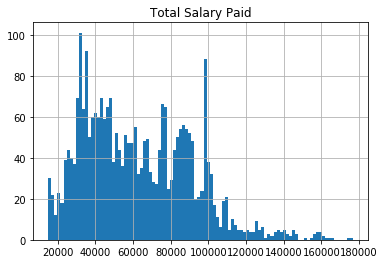

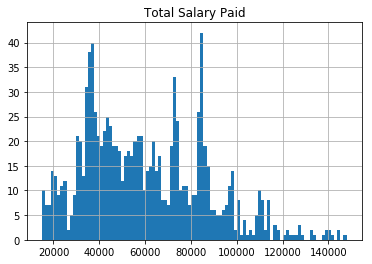

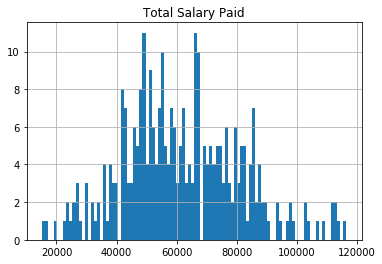

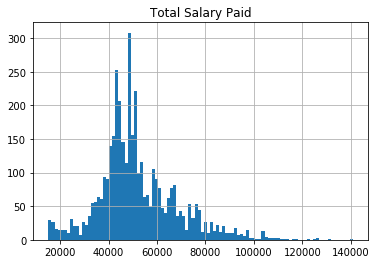

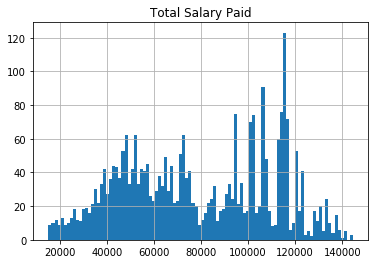

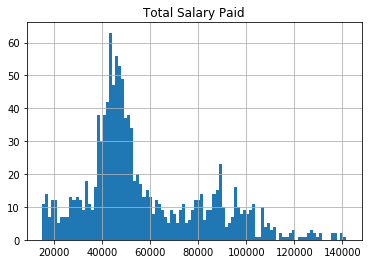

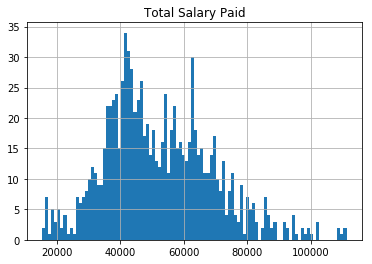

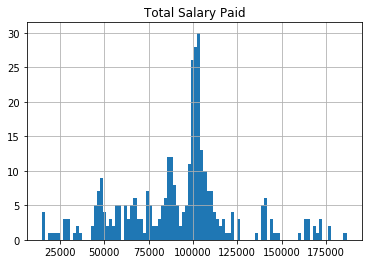

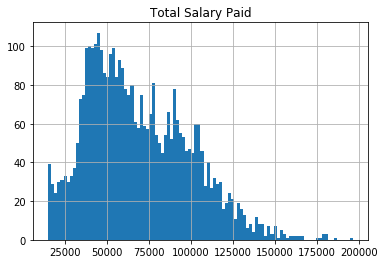

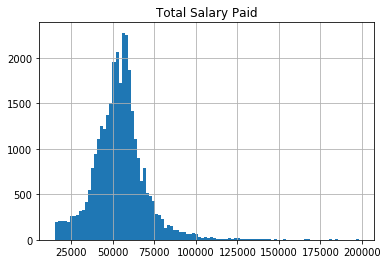

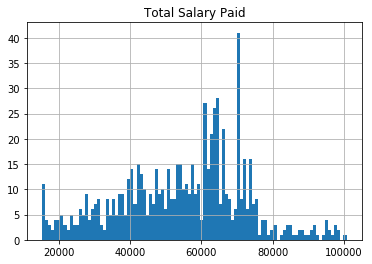

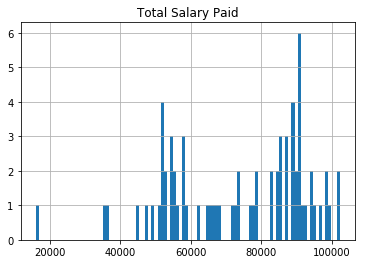

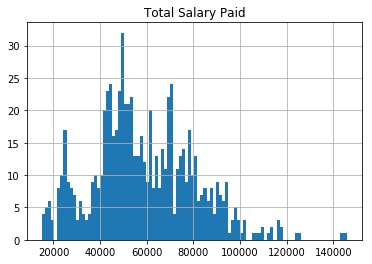

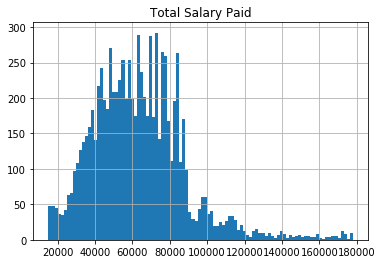

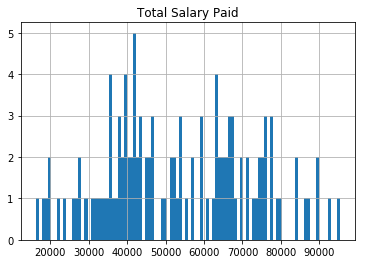

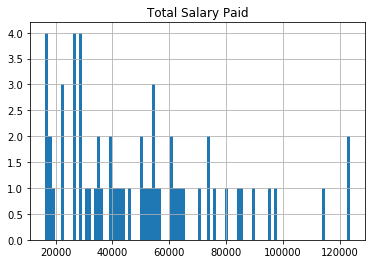

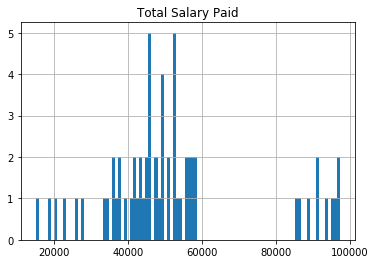

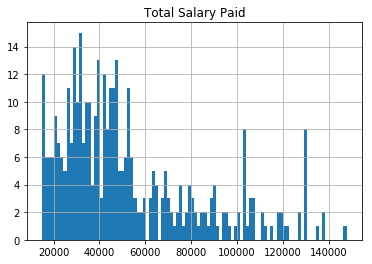

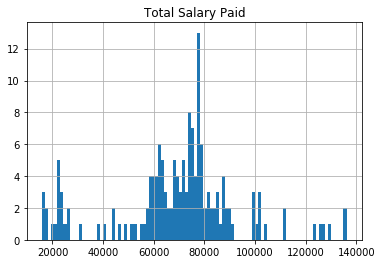

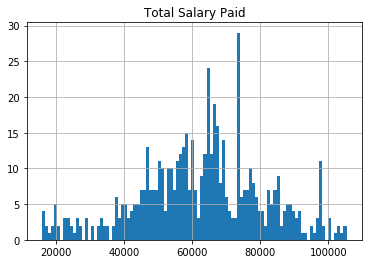

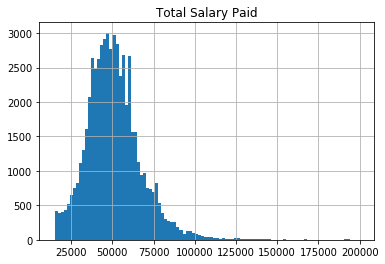

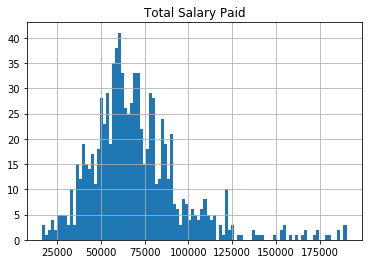

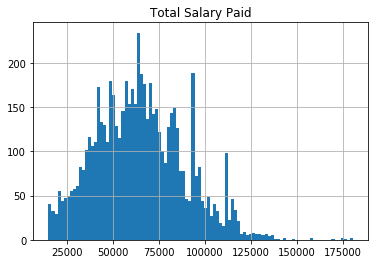

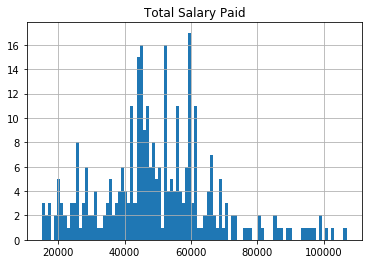

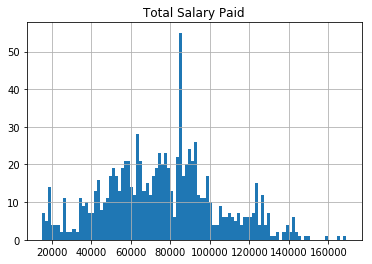

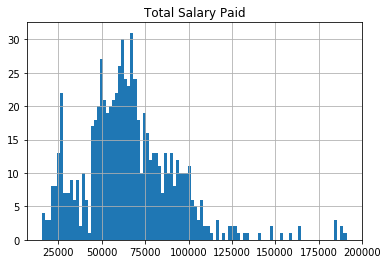

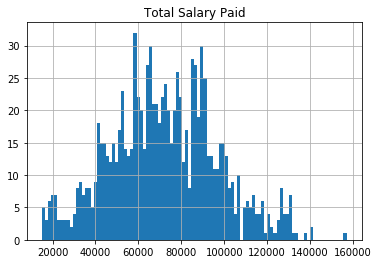

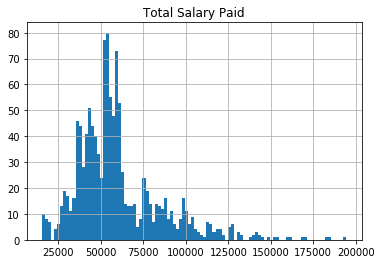

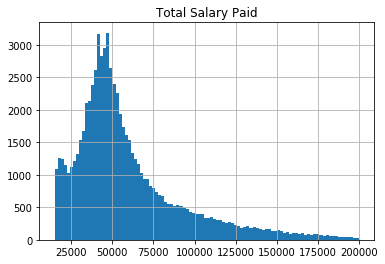

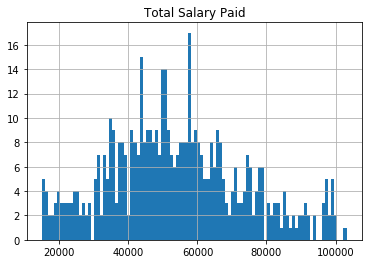

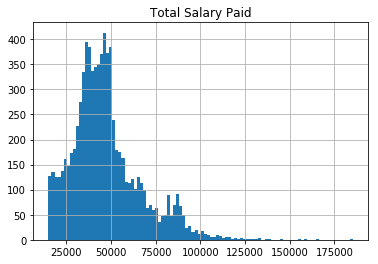

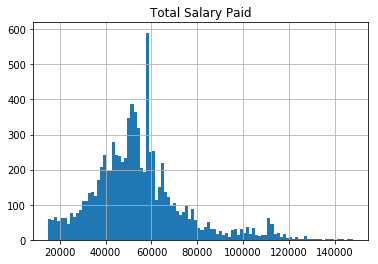

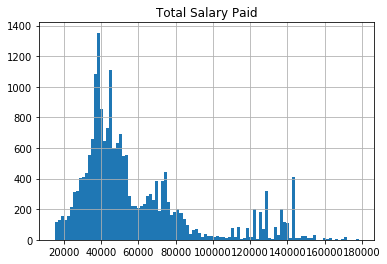

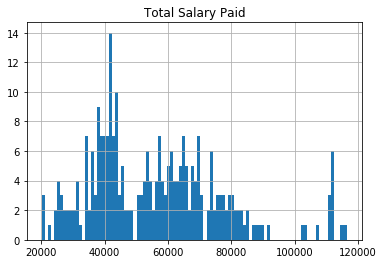

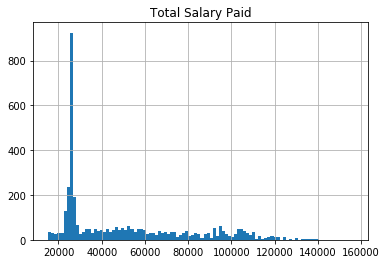

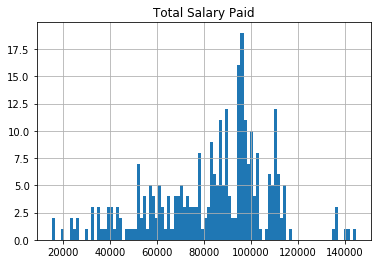

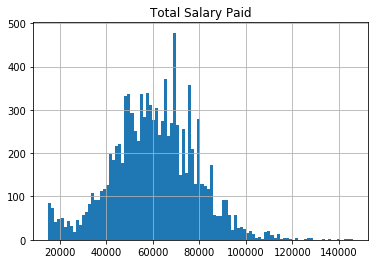

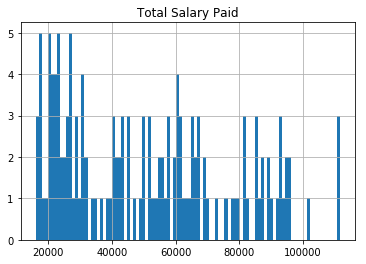

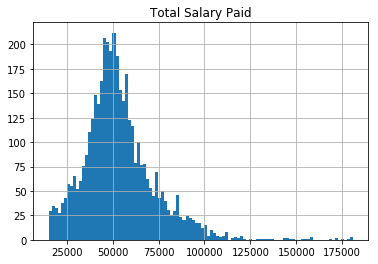

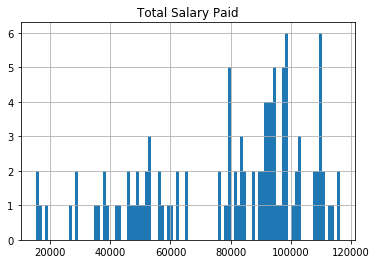

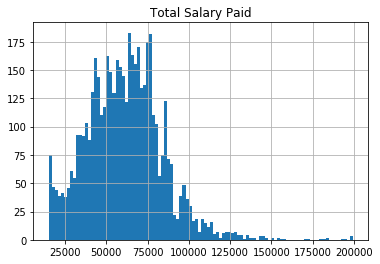

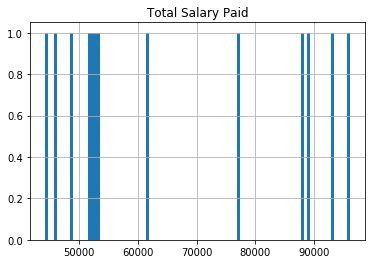

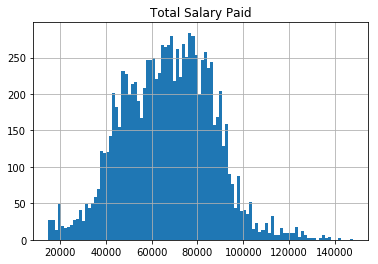

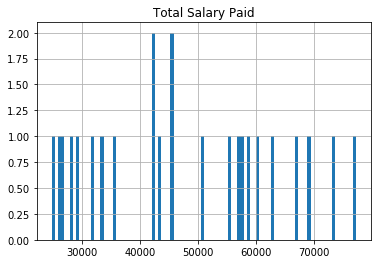

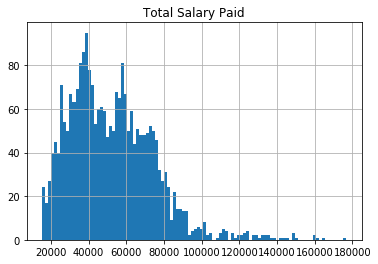

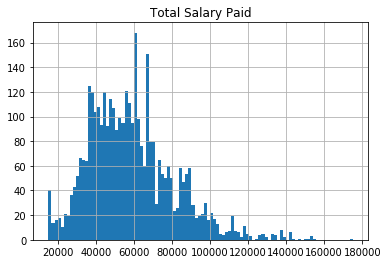

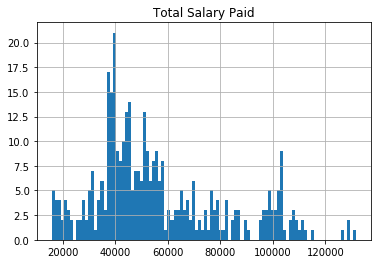

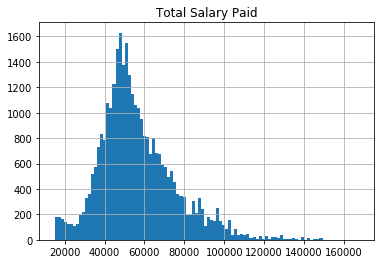

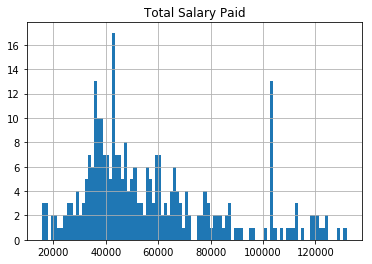

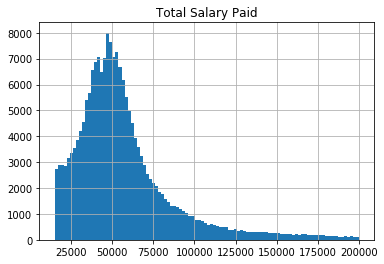

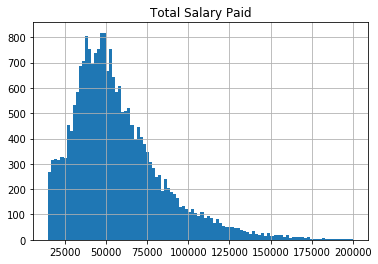

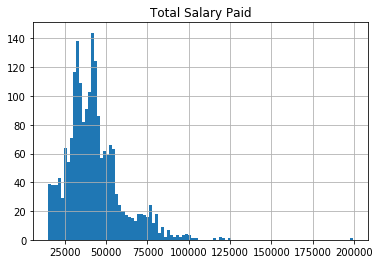

In [313]:
for k, i in enumerate(filter_two.groupby(["Department"])): 
    Daging=i[1]
    Daging.hist(column='Total Salary Paid', bins=100)
    print(i[0])

In [403]:
def removeOutliersTukey(usefulData, attr):
    thirdQuartile = usefulData.quantile(.75)[attr]
    firstQuartile = usefulData.quantile(.25)[attr]
    IQR = thirdQuartile - firstQuartile
    return usefulData[usefulData[attr].between(firstQuartile - IQR * 1.5, thirdQuartile + IQR * 1.5)]

In [447]:
def normal_distribution_compares_Second(DepartmentDataFrame, title):
    miu=mean=DepartmentDataFrame['Total Salary Paid'].mean()
    variance=DepartmentDataFrame['Total Salary Paid'].var()
    sample_size=DepartmentDataFrame['Total Salary Paid'].count()
    print("so the miu is ", miu)
    print("so the variance is ", variance)
    origion_data=DepartmentDataFrame["Total Salary Paid"].values.tolist()
    new_list = map(lambda x: (x-miu)/math.sqrt(variance), origion_data)
    convert_data=np.array(list(new_list))
    
    print("mean after convert", convert_data.mean())
    print("variance after convertion", convert_data.var())
    ks_value=stats.kstest(convert_data, 'norm')
    print("ks_value is ", ks_value)
    critical_value=1.94/math.sqrt(len(DepartmentDataFrame))
    print("critical_value is ", critical_value)
    
    if ks_value[0]<critical_value and ks_value[1]>0.1:
        print("THIS IS NORMAL!!!@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        plt.hist(origion_data, normed=True, label='normonized histogram')
        sigma = math.sqrt(variance)
        x = np.linspace(miu - 3*sigma, miu + 3*sigma, 100)
        plt.plot(x,mlab.normpdf(x, miu, sigma), label="fitted normal distribution")
        title=title+" (with sample size "+ str(sample_size)+")"
        plt.title(title)
        plt.legend()
        plt.show()
 

so the miu is  46662.10807328946
so the variance is  1039382997.0717515
mean after convert -8.299497171203002e-16
variance after convertion 0.9997137131405666
ks_value is  KstestResult(statistic=0.09043406498122691, pvalue=3.0772311756817813e-25)
critical_value is  0.03282482633865122
so the miu is  40699.15761022364
so the variance is  1016474573.0095326
mean after convert -3.632167339348755e-17
variance after convertion 0.9993610223642193
ks_value is  KstestResult(statistic=0.13017007749073667, pvalue=0.0)
critical_value is  0.049039333499059194
so the miu is  57249.90253086424
so the variance is  575957278.8612126
mean after convert -1.6667051826471485e-15
variance after convertion 0.9969135802469138
ks_value is  KstestResult(statistic=0.06598032509369597, pvalue=0.11387143215578188)
critical_value is  0.10777777777777778
THIS IS NORMAL!!!@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


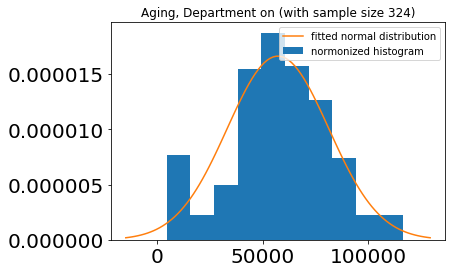

so the miu is  46310.68316116133
so the variance is  441749364.14405423
mean after convert 1.3054706703568411e-14
variance after convertion 0.9997783196630431
ks_value is  KstestResult(statistic=0.11315090579544218, pvalue=1.3669550632764094e-50)
critical_value is  0.02888453074156644
so the miu is  68064.90973646758
so the variance is  1092793180.3122532
mean after convert -1.0491133128423702e-14
variance after convertion 0.9996438746438769
ks_value is  KstestResult(statistic=0.08793525704390004, pvalue=2.761929088901838e-19)
critical_value is  0.03661029077067526
so the miu is  48251.94666666656
so the variance is  749717544.4361577
mean after convert 3.860307936705306e-15
variance after convertion 0.9992784992784994
ks_value is  KstestResult(statistic=0.10461115599097637, pvalue=1.163513729807164e-13)
critical_value is  0.05210988500697459
so the miu is  46252.143614678906
so the variance is  491344149.65125954
mean after convert -2.835652202345354e-16
variance after convertion 0.99

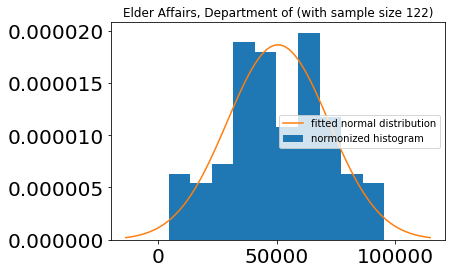

so the miu is  35260.39156626505
so the variance is  748163490.5053471
mean after convert 4.922434615205513e-16
variance after convertion 0.987951807228916
ks_value is  KstestResult(statistic=0.11352905898369808, pvalue=0.21812476249853363)
critical_value is  0.21294266437999926
THIS IS NORMAL!!!@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


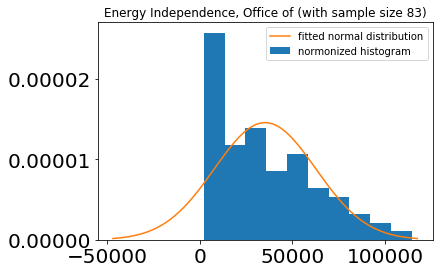

so the miu is  38282.02488636362
so the variance is  759333230.1432368
mean after convert 4.996003610813204e-16
variance after convertion 0.9886363636363634
ks_value is  KstestResult(statistic=0.11777720282966397, pvalue=0.16067739722277352)
critical_value is  0.2068046948649421
THIS IS NORMAL!!!@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


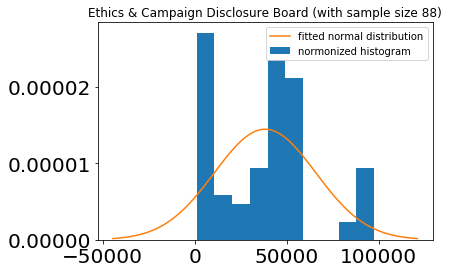

so the miu is  40251.17223981899
so the variance is  767003161.6023043
mean after convert 5.787225902118463e-16
variance after convertion 0.9977375565610852
ks_value is  KstestResult(statistic=0.09622285225546057, pvalue=0.0005163258689149242)
critical_value is  0.09227638986597185
so the miu is  63060.97191358025
so the variance is  640118463.0719287
mean after convert -1.5351231945434262e-16
variance after convertion 0.9938271604938268
ks_value is  KstestResult(statistic=0.1665188910708349, pvalue=0.00021465513794738378)
critical_value is  0.15242079505576692
so the miu is  54892.28142857146
so the variance is  664031131.4451301
mean after convert -1.3042988774705371e-15
variance after convertion 0.9984639016897081
ks_value is  KstestResult(statistic=0.09336360644273406, pvalue=2.1733069642371206e-05)
critical_value is  0.07603459476195319
so the miu is  45801.93255708228
so the variance is  415723903.0373082
mean after convert 8.200453828762555e-14
variance after convertion 0.999984

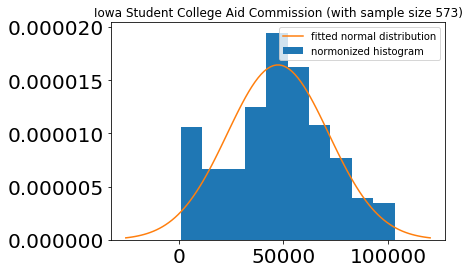

so the miu is  39397.32229687331
so the variance is  532465915.67468226
mean after convert 4.730720632704097e-15
variance after convertion 0.9998988161489393
ks_value is  KstestResult(statistic=0.05580270403593124, pvalue=3.716459667899085e-27)
critical_value is  0.019514495684990744
so the miu is  48259.62353880626
so the variance is  556710869.7616942
mean after convert -1.8849511289414518e-14
variance after convertion 0.9998982809480264
ks_value is  KstestResult(statistic=0.06497602574318673, pvalue=1.7780706397337294e-36)
critical_value is  0.01956603751468447
so the miu is  46055.29488500634
so the variance is  451815491.6832587
mean after convert -3.843224824454751e-14
variance after convertion 0.9999497840715321
ks_value is  KstestResult(statistic=0.08137491224979565, pvalue=5.779642673083057e-115)
critical_value is  0.013747460437274955
so the miu is  45127.92181556196
so the variance is  776285744.2401322
mean after convert -2.047673590086744e-17
variance after convertion 0.99

In [540]:
filter_removed = removeOutliersTukey(data, "Total Salary Paid")
for k, i in enumerate(filter_removed.groupby(["Department"])):  
    a=i[1]['Total Salary Paid'].count()
    if int(a)>30:
        normal_distribution_compares_Second(i[1],i[0])
    
    

In [514]:
filter_removed = removeOutliersTukey(data, "Total Salary Paid")
normal_distribution_compares_Second(filter_removed,"all samples")
    

so the miu is  43800.081471436104
so the variance is  719402859.9806142
mean after convert -1.0669853426561329e-13
variance after convertion 0.9999984283252725
ks_value is  KstestResult(statistic=0.06810540889292216, pvalue=0.0)
critical_value is  0.002432109108500814


In [524]:
AgingDataFrame=filter_removed.loc[filter_removed['Department'] == "Aging, Department on"]
Aginglist=AgingDataFrame["Total Salary Paid"].tolist()
ElderAffairsFrame= filter_removed.loc[filter_removed['Department']=="Elder Affairs, Department of"]
ElderAffairslist=ElderAffairsFrame["Total Salary Paid"].tolist()
print(stats.ks_2samp(Aginglist, ElderAffairslist))


Ks_2sampResult(statistic=0.2222222222222222, pvalue=0.00024683034287488747)
